<a href="https://colab.research.google.com/github/xDocka15/MPA-MLF_Dockal/blob/main/nlf5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

In [38]:
path_to_dataset = 'voting_complete.csv' # change the PATH
pd_dataset = pd.read_csv(path_to_dataset)
# https://github.com/MPA-MLF/Exercises/blob/main/Lab_05/voting_complete.csv

In [39]:
pd_dataset

,Unnamed: 0,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [40]:
def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()

    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]

In [41]:
x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

In [42]:
x_train

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,y,n,y,n,?,n,y,y,y,y,n,y,n,?,y,y
344,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
345,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
346,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [43]:
#replace ? with nan
x_train.replace('?', np.nan, inplace=True)
x_train.fillna(x_train.mode().iloc[0],inplace=True)
x_train
#perform one hot Encoding
x=pd.get_dummies(x_train)
x


,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_y,...,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
1,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
2,True,False,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,True,False,True,False
3,True,False,False,True,False,True,True,False,True,False,...,True,False,False,True,True,False,True,False,False,True
4,True,False,False,True,True,False,False,True,False,True,...,True,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,False,True,True,False,False,True,True,False,True,False,...,False,True,True,False,False,True,False,True,False,True
344,True,False,True,False,False,True,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
345,True,False,True,False,False,True,True,False,True,False,...,True,False,True,False,True,False,True,False,False,True
346,True,False,True,False,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True


In [44]:
y = y_train.replace({'republican': 1,'democrat': 0})

<ipython-input-44-54bb004ca497>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y_train.replace({'republican': 1,'democrat': 0})


In [45]:
model = Sequential()
model.add(Dense(8, input_shape=(x.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

history = model.fit(x_train, y_train, epochs=40, batch_size=4, verbose=1, validation_data=(x_val, y_val))

Epoch 1/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8387 - loss: 0.3080 - val_accuracy: 0.9143 - val_loss: 0.1854
Epoch 2/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9568 - loss: 0.1222 - val_accuracy: 0.9000 - val_loss: 0.3308
Epoch 3/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9623 - loss: 0.1185 - val_accuracy: 0.9429 - val_loss: 0.2544
Epoch 4/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9762 - loss: 0.0806 - val_accuracy: 0.9000 - val_loss: 0.2546
Epoch 5/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9681 - loss: 0.0806 - val_accuracy: 0.9429 - val_loss: 0.2620
Epoch 6/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.0844 - val_accuracy: 0.9143 - val_loss: 0.2357
Epoch 7/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9682 - loss: 0.0712 - val_accuracy: 0.9429 - val_loss: 0.2721
Epoch 8/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9667 - loss: 0.1025 - val_accuracy: 0.9000 - val_loss:

In [49]:
#replace ? with nan
x_test.replace('?', np.nan, inplace=True)
x_test.fillna(x_train.mode().iloc[0],inplace=True)
x_test
#perform one hot Encoding
x2=pd.get_dummies(x_test)
x2

,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_y,...,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,False,True,False,True,False,True,True,False,False,True,...,False,False,False,True,False,True,False,True,False,True
1,True,False,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,False,True,False,True
2,True,False,False,True,False,True,True,False,True,False,...,True,False,False,True,True,False,False,False,False,False
3,False,True,False,True,False,True,True,False,True,False,...,True,False,True,False,True,False,False,True,False,True
4,False,True,False,True,False,True,True,False,True,False,...,True,False,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,False,True,False,True,False,True,True,False,False,True,...,True,False,False,True,True,False,False,True,False,True
83,True,False,False,True,True,False,False,True,False,True,...,False,False,False,False,False,True,True,False,False,False
84,False,True,False,True,False,True,False,True,False,True,...,False,False,False,False,False,True,True,False,False,True
85,True,False,False,True,False,True,True,False,True,False,...,True,False,True,False,True,False,True,False,False,True


In [50]:
y2 = y_test.replace({'republican': 1,'democrat': 0})

<ipython-input-50-c34b5fa82cf0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y2 = y_test.replace({'republican': 1,'democrat': 0})


In [55]:
loss, accuracy = model.evaluate(x2,y2,verbose=0)
print(loss)
print(accuracy)

0.04341858997941017
0.977011501789093


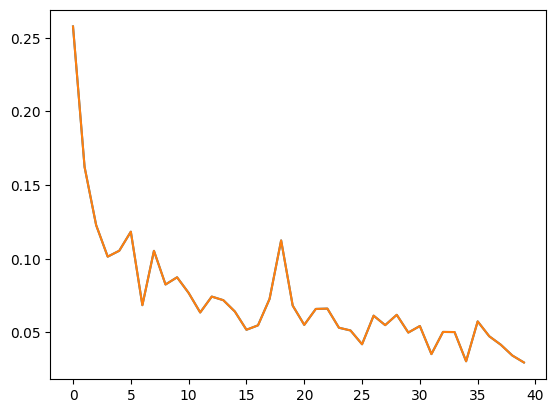

In [56]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='training loss')
ax.plot(history.history['loss'], label='training loss')